In [ ]:
import numpy as np
!pip install -q git+https://github.com/huggingface/transformers.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 76.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.7 MB/s eta 0:00:00


In [ ]:
from warnings import filterwarnings
import tensorflow as tf
from tensorflow import io
from tensorflow import image as image_tf
from matplotlib import pyplot as plt

##Image Preprocessing

In [ ]:
!pip install -q git+https://github.com/RiteshKH/Cursive_handwriting_recognition

ERROR: git+https://github.com/RiteshKH/Cursive_handwriting_recognition does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.


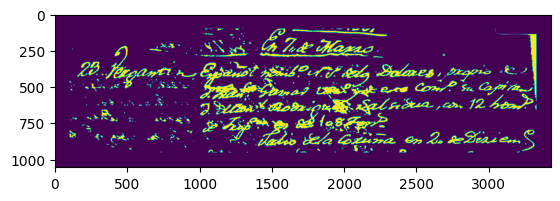

12.059999 Angle (1054, 3430)


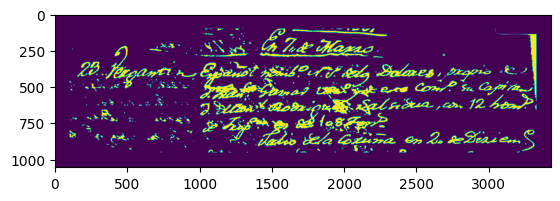

Ang -25
Ang -22
Ang -19
Ang -16
Ang -13
Ang -10
Ang -7
Ang -4
Ang -1
Ang 2
Ang 5
Ang 8
Ang 11
Ang 14
Ang 17
Ang 20
Ang 23


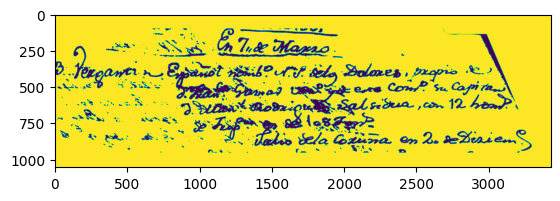

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
from collections import OrderedDict

# In[deskew]:
def deskew(img):
    thresh=img
    edges = cv2.Canny(thresh,50,200,apertureSize = 3)

    lines = cv2.HoughLines(edges,1,np.pi/1000, 55)
    try:
        d1 = OrderedDict()
        for i in range(len(lines)):
            for rho,theta in lines[i]:
                deg = np.rad2deg(theta)
#                print(deg)
                if deg in d1:
                    d1[deg] += 1
                else:
                    d1[deg] = 1

        t1 = OrderedDict(sorted(d1.items(), key=lambda x:x[1] , reverse=False))
        print(list(t1.keys())[0],'Angle' ,thresh.shape)
        non_zero_pixels = cv2.findNonZero(thresh)
        center, wh, theta = cv2.minAreaRect(non_zero_pixels)
        angle=list(t1.keys())[0]
        if angle>160:
            angle=180-angle
        if angle<160 and angle>20:
            angle=12
        root_mat = cv2.getRotationMatrix2D(center, angle, 1)
        rows, cols = img.shape
        rotated = cv2.warpAffine(img, root_mat, (cols, rows), flags=cv2.INTER_CUBIC)

    except:
        rotated=img
        pass
    return rotated

def unshear(img):

    gray = img
    thresh = img.copy()
    #print(thresh)
    plt.imshow(thresh)
    plt.show()
    trans = thresh.transpose()

    arr=[]
    for i in range(thresh.shape[1]):
        arr.insert(0,trans[i].sum())

    arr=[]
    for i in range(thresh.shape[0]):
        arr.insert(0,thresh[i].sum())

    y = thresh.shape[0]-1-np.nonzero(arr)[0][0]
    y_top = thresh.shape[0]-1-np.nonzero(arr)[0][-1]

    trans1 = thresh.transpose()
    sum1=[]
    for i in range(trans1.shape[0]):
        sum1.insert(i,trans1[i].sum())

    height = y - y_top
    max_value = 255*height
    prev_num = len([i for i in sum1 if i>=(0.6*max_value)])
    final_ang = 0

    # # print(arr)
    # # print(x,y)
    for ang in range(-25,25,3):
        thresh = gray.copy()
        #print(thresh[0].shape)
        #print(ang)
        print('Ang',ang)
        if ang>0:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(ang))))
                if move >= temp.size:
                    move = temp.size
                thresh[i][:temp.size-move]=temp[move:]
                thresh[i][temp.size-move:] = [0 for m in range(move)]
        else:
            #print(ang)
            for i in range(y):
                temp = thresh[i]
                move = int((y-i)*(math.tan(math.radians(-ang))))
                if move >= temp.size:
                    move = temp.size
                #print(temp[:-3])
                #print(temp[:temp.size-move].shape, thresh[i][move%temp.size:].shape)
                thresh[i][move:]=temp[:temp.size-move]
                thresh[i][:move]=[0 for m in range(move)]

#         plt.imshow(thresh)
#         plt.show()
        trans1 = thresh.transpose()
        sum1=[]
        for i in range(trans1.shape[0]):
            sum1.insert(i,trans1[i].sum())
        #print(sum1)
        num = len([i for i in sum1 if i>=(0.60*max_value)])
        #print(num, prev_num)
        if(num>=prev_num):
            prev_num=num
            final_ang = ang
        #plt.imshow(thresh)
        #plt.show()
    #print("final_ang:", final_ang)

    thresh= gray.copy()
    if final_ang>0:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(final_ang))))
            if move >= temp.size:
                move = temp.size
            thresh[i][:temp.size-move]=temp[move:]
            thresh[i][temp.size-move:] = [0 for m in range(move)]
    else:
        for i in range(y):
            temp = thresh[i]
            move = int((y-i)*(math.tan(math.radians(-final_ang))))
            #print(move)
            if move >= temp.size:
                move = temp.size
            thresh[i][move:]=temp[:temp.size-move]
            thresh[i][:move]=[0 for m in range(move)]

#    plt.imshow(thresh)
#    plt.show()
    return thresh


#In[Main]:

def pad_with(vector, pad_width, iaxis, kwargs):
     pad_value = kwargs.get('padder', 40)
     vector[:pad_width[0]] = pad_value
     vector[-pad_width[1]:] = pad_value
     return vector

if __name__ == '__main__':
    img10 = cv2.imread('example_crop_1746.png',0)

    thresh = cv2.threshold(img10,127,255,1)[1]
    thresh=np.pad(thresh, 100, pad_with, padder=0)

    plt.imshow(thresh)
    plt.show()
    deskew(thresh)
    sheared_img = unshear(thresh)

    ret, thresh = cv2.threshold(sheared_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

    plt.imshow(thresh)
    plt.show()
    cv2.imwrite('drive/MyDrive/Global_Americas/processed_image/c.png', thresh)
else:
    print("shear code: 2.34")

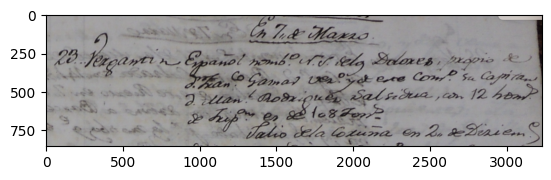

In [ ]:
import keras.utils as image_k
img = image_k.load_img("example_crop_1746.png")
img = np.asarray(img)
plt.imshow(img)

#,target_size=(1000,2000,3)


In [ ]:
# img = deskew(img)
# plt.imshow(img)

In [ ]:
# img = unshear(img)
# plt.imshow(img)

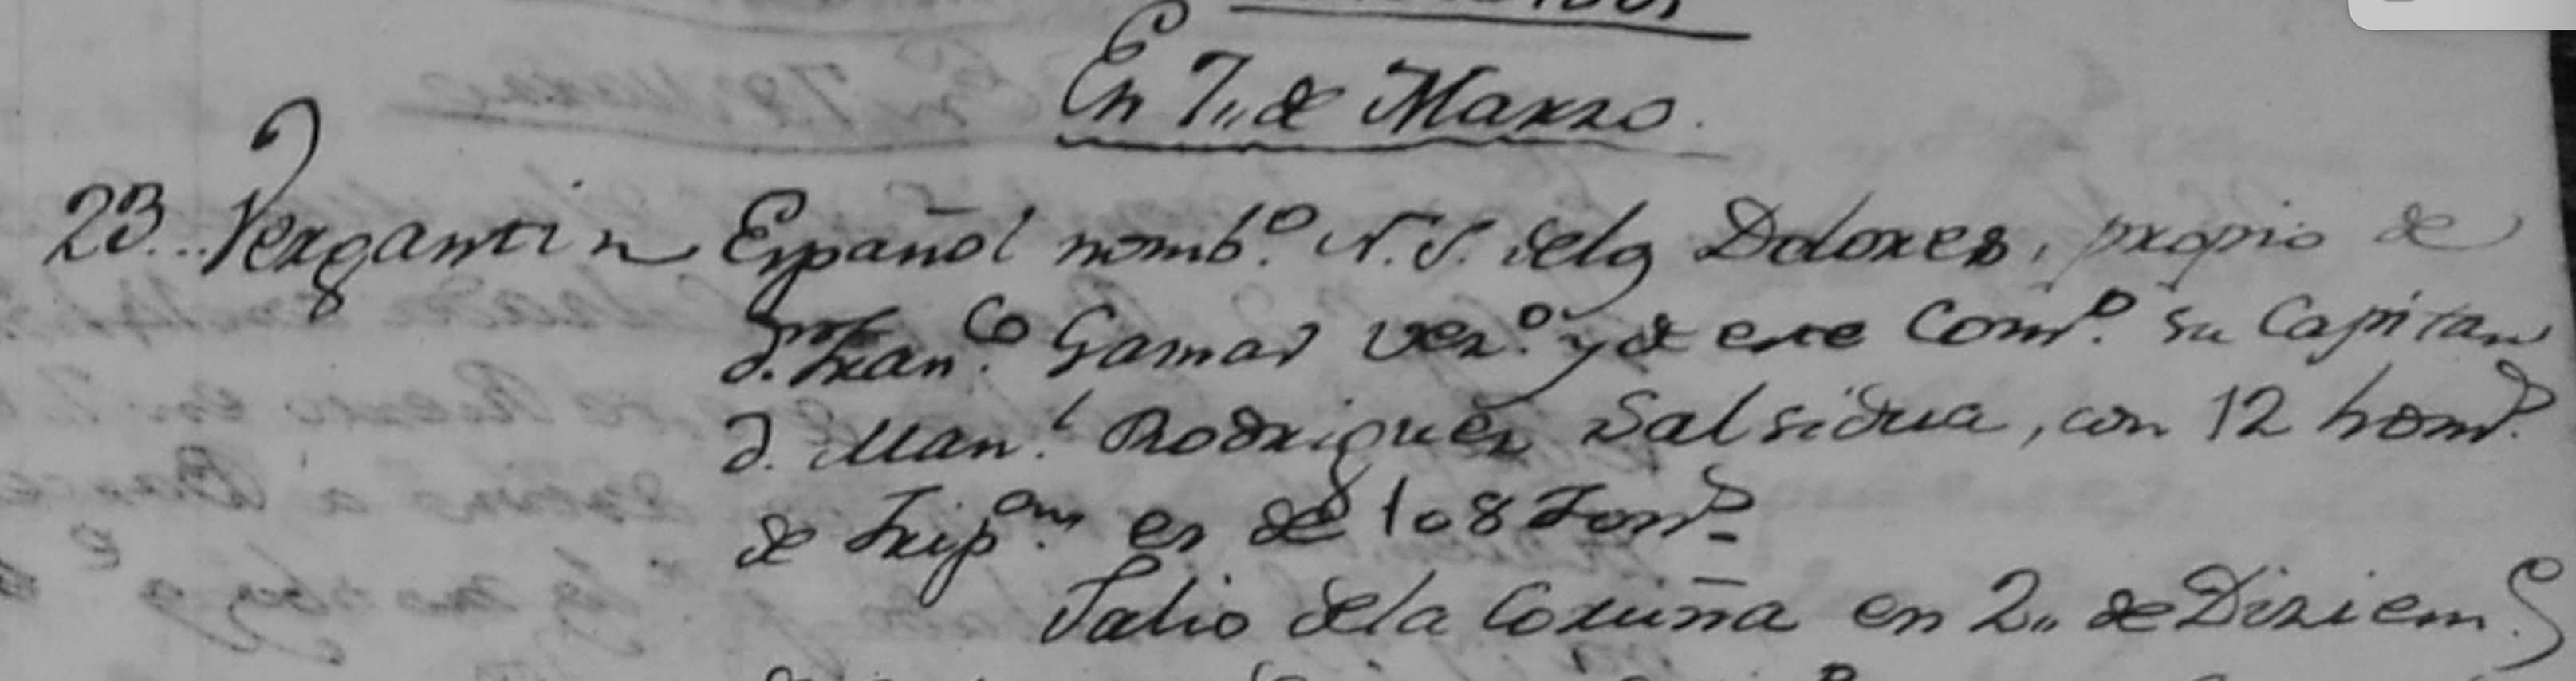

In [ ]:
from google.colab.patches import cv2_imshow
img10 = cv2.imread('example_crop_1746.png',0)
cv2_imshow(img10)

In [ ]:
img10

array([[166, 166, 166, ..., 175, 174, 174],
       [166, 166, 166, ..., 175, 174, 174],
       [165, 165, 165, ..., 175, 174, 174],
       ...,
       [164, 164, 164, ..., 149, 149, 149],
       [164, 164, 164, ..., 149, 149, 148],
       [164, 164, 164, ..., 149, 148, 148]], dtype=uint8)

In [ ]:
deskew(img10)

5.58 Angle (854, 3230)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

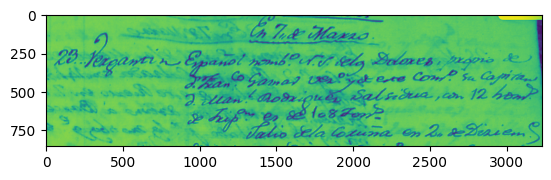

Ang -25
Ang -22
Ang -19
Ang -16
Ang -13
Ang -10
Ang -7
Ang -4
Ang -1
Ang 2
Ang 5
Ang 8
Ang 11
Ang 14
Ang 17
Ang 20
Ang 23


array([[  0,   0,   0, ..., 178, 178, 178],
       [  0,   0,   0, ..., 178, 178, 178],
       [  0,   0,   0, ..., 178, 178, 178],
       ...,
       [164, 164, 164, ..., 149, 149, 149],
       [164, 164, 164, ..., 149, 149, 148],
       [164, 164, 164, ..., 149, 148, 148]], dtype=uint8)

In [ ]:
unshear(img10)

##Binarization

<dtype: 'uint8'>


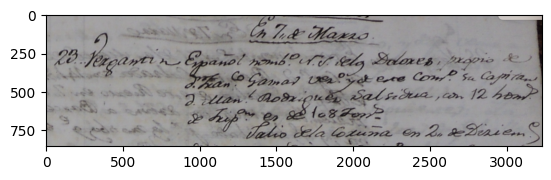

In [ ]:
#tf_img.shape

TensorShape([854, 3230, 3])

In [ ]:
#import keras.utils as image_k

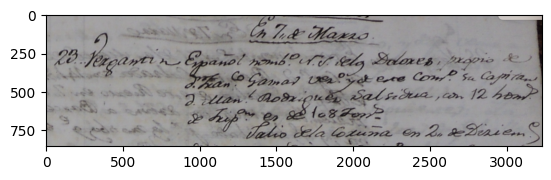

In [ ]:
# img = image_k.load_img("example_crop_1746.png")
# img = np.asarray(img)
# plt.imshow(img)

# #,target_size=(1000,2000,3)


In [ ]:
img.size

8275260

In [ ]:
img.shape

(854, 3230, 3)

In [ ]:
img

array([[[166, 166, 167],
        [166, 166, 167],
        [166, 166, 166],
        ...,
        [183, 173, 168],
        [183, 172, 168],
        [182, 172, 168]],

       [[166, 166, 167],
        [166, 166, 166],
        [166, 166, 166],
        ...,
        [183, 173, 168],
        [183, 172, 168],
        [182, 172, 168]],

       [[166, 165, 167],
        [166, 165, 166],
        [166, 165, 166],
        ...,
        [183, 173, 168],
        [183, 172, 168],
        [182, 172, 168]],

       ...,

       [[164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        ...,
        [149, 150, 145],
        [149, 150, 145],
        [149, 150, 145]],

       [[164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        ...,
        [149, 150, 145],
        [149, 150, 145],
        [148, 150, 144]],

       [[164, 164, 164],
        [164, 164, 164],
        [164, 164, 164],
        ...,
        [149, 150, 145],
        [148, 149, 144],
        [148, 149, 144]]

In [ ]:
from skimage.filters import threshold_otsu,threshold_li

In [ ]:
from scipy import ndimage as ndi
from skimage import color, data, filters, graph, measure, morphology

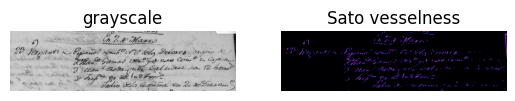

In [ ]:
retina = color.rgb2gray(img)
t0,t1,t2,t3,t4 = filters.threshold_multiotsu(retina, classes=6)
mask = (retina < t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask

_, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(retina, cmap='gray')
axes[0].set_axis_off()
axes[0].set_title('grayscale')
axes[1].imshow(vessels, cmap='magma')
axes[1].set_axis_off()
_ = axes[1].set_title('Sato vesselness')

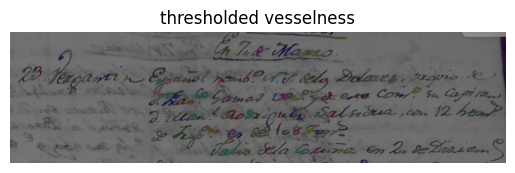

In [ ]:
thresholded = filters.apply_hysteresis_threshold(vessels, 0.01, 0.03)
labeled = ndi.label(thresholded)[0]

_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()
_ = ax.set_title('thresholded vesselness')

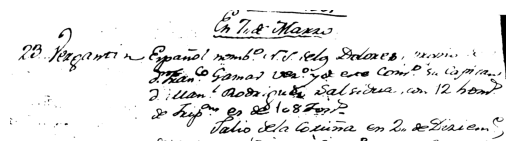

In [ ]:
#retain only what is in color

mask = (retina < t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()

thresh = threshold_li(retina)
binary = thresh > retina


ax.imshow(binary, cmap = 'gray_r')
plt.savefig('binary_page')

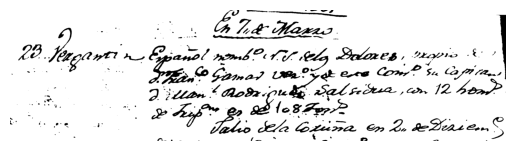

In [ ]:
mask = (retina < t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()

thresh = threshold_otsu(retina)
binary = thresh > retina


ax.imshow(binary, cmap = 'gray_r')
plt.savefig('binary_page_otsu')

In [ ]:
import skimage
image_otsu = skimage.io.imread(fname="binary_page_otsu.png")
image = skimage.io.imread(fname="binary_page.png")

In [ ]:
plt.show(image)

ValueError: ignored

In [ ]:
image = deskew(image)

67.32 Angle (480, 640, 4)


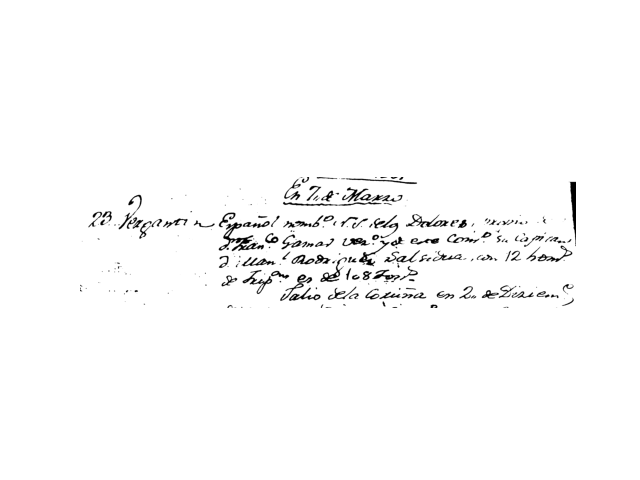

In [ ]:
cv2_imshow(image)

0.9 Angle (480, 640, 4)


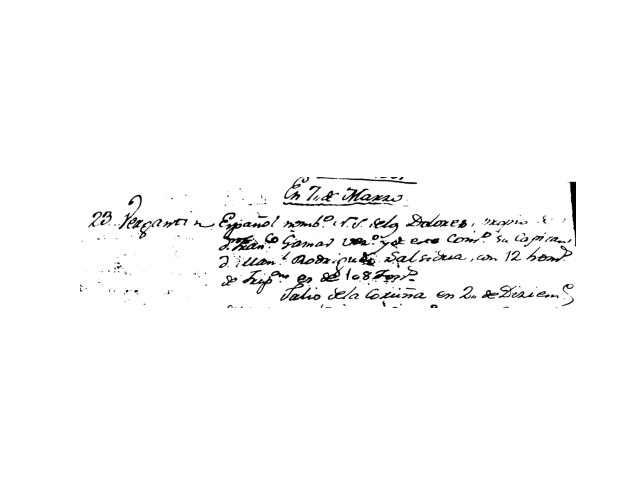

In [ ]:
image_otsu = deskew(image_otsu)
cv2_imshow(image_otsu)

##Character Segmentation

No. of Lines 1


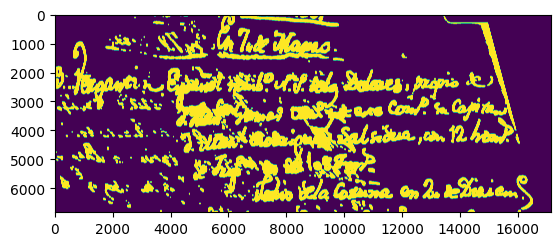

Area=  188528.0
0 1796 325 792
Area=  23046.0
60 3180 190 168
Area=  24365.5
70 4884 220 168
Area=  92214.5
160 5580 355 464
Area=  100992.5
245 3012 570 464
Area=  18010.0
355 2764 145 184
Area=  11864.0
450 2476 110 120
Area=  13601.5
530 5236 120 160
Area=  31491.0
575 4852 310 232
Area=  11108.5
580 2468 100 128
Area=  1301461.5
620 940 2320 2368
Area=  53609.0
675 5308 285 408
Area=  34844.0
785 4748 240 240
Area=  70410.0
855 2988 415 376
Area=  35463.5
875 4020 225 248
Area=  226866.5
975 4436 750 704
Area=  46057.0
1085 3892 250 352
Area=  65713.5
1130 5788 320 368
Area=  15755.5
1665 4172 195 96
Area=  175050.0
1710 5748 680 696
Area=  66088.0
1740 956 480 304
Area=  25280.0
1790 3956 270 288
Area=  14539.0
1835 6444 165 120
Area=  31796.5
2015 4884 225 280
Area=  108051.5
2055 756 570 344
Area=  32052.0
2145 2956 240 320
Area=  14739.5
2185 4164 165 112
Area=  13280.0
2270 1204 185 96
Area=  10225.5
2300 2892 135 112
Area=  15642.0
2370 4012 175 136
Area=  14991.5
2425 4164 1

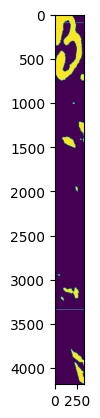

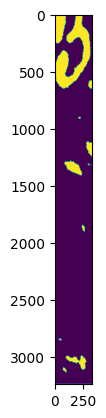

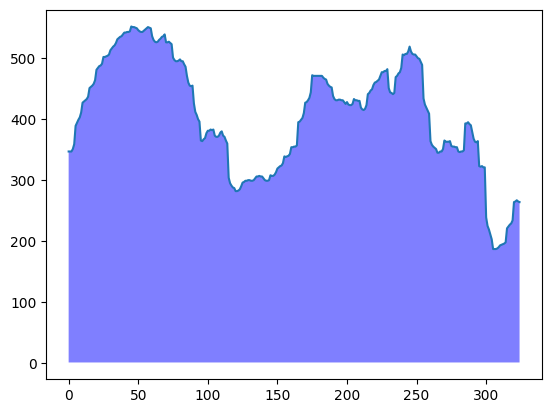

At arr Seg here:  []
Difference array:  []
Does it work::::
Error Message  local variable 'letter3' referenced before assignment


Traceback (most recent call last):
  File "<ipython-input-49-fb3b34874e62>", line 340, in <cell line: 305>
    seg = visualize(letter2, upper_baseline, lower_baseline, min_pixel_threshold, min_separation_threshold, min_round_letter_threshold)
  File "<ipython-input-49-fb3b34874e62>", line 259, in visualize
    plt.imshow(letter3)
UnboundLocalError: local variable 'letter3' referenced before assignment
NoneType: None


In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct  4 15:21:36 2018

@author: 726094
"""

import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib as mpl
import traceback

mpl.rcParams['legend.fontsize'] = 10

pd.set_option('display.expand_frame_repr', False)
fn=0
path='./result/'

#Taking any image from the sample images
#In case of slanted image, straighten it using image-straighten.py, then use it
img = cv.imread('drive/MyDrive/Global_Americas/processed_image/c.png')

# In[findFeaturPoints]
def findCapPoints(img):
    cpoints=[]
    dpoints=[]
    for i in range(img.shape[1]):
        col = img[:,i:i+1]
        k = col.shape[0]
        while k > 0:
            if col[k-1]==255:
                dpoints.append((i,k))
                break
            k-=1

        for j in range(col.shape[0]):
            if col[j]==255:
                cpoints.append((i,j))
                break
    return cpoints,dpoints


# In[wordSegment]
#*****************************************************************************#
def wordSegment(textLines):
    wordImgList=[]
    counter=0
    cl=0
    for txtLine in textLines:
        gray = cv.cvtColor(txtLine, cv.COLOR_BGR2GRAY)
        th, threshed = cv.threshold(gray, 100, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
        final_thr = cv.dilate(threshed,None,iterations = 20)

        plt.imshow(final_thr)
        plt.show()

        contours, hierarchy = cv.findContours(final_thr,cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
        boundingBoxes = [cv.boundingRect(c) for c in contours]
        (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b: b[1][0], reverse=False))

        for cnt in contours:
            area = cv.contourArea(cnt)

#            print area
            if area > 10000:
                print ('Area= ',area)
                x,y,w,h = cv.boundingRect(cnt)
                print (x,y,w,h)
                letterBgr = txtLine[0:txtLine.shape[1],x:x+w]
                wordImgList.append(letterBgr)

                cv.imwrite("./result/words/" + str(counter) +".jpg",letterBgr)
                counter=counter+1
        cl=cl+1

    return wordImgList
#*****************************************************************************#

# In[fitToSize]
#*****************************************************************************#
def fitToSize(thresh1):

    mask = thresh1 > 0
    coords = np.argwhere(mask)

    x0, y0 = coords.min(axis=0)
    x1, y1 = coords.max(axis=0) + 1   # slices are exclusive at the top
    cropped = thresh1[x0:x1,y0:y1]
    return cropped

#*****************************************************************************#

# In[lineSegment]
#*****************************************************************************#
def lineSegment(img):
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    th, threshed = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)

    upper=[]
    lower=[]
    flag=True
    for i in range(threshed.shape[0]):

        col = threshed[i:i+1,:]
        cnt=0
        if flag:
            cnt=np.count_nonzero(col == 255)
            if cnt >0:
                upper.append(i)
                flag=False
        else:
            cnt=np.count_nonzero(col == 255)
            if cnt <2:
                lower.append(i)
                flag=True
    textLines=[]
    if len(upper)!= len(lower):lower.append(threshed.shape[0])
#    print upper
#    print lower
    for i in range(len(upper)):
        timg=img[upper[i]:lower[i],0:]

        if timg.shape[0]>5:
#            plt.imshow(timg)
#            plt.show()
            timg=cv.resize(timg,((timg.shape[1]*5,timg.shape[0]*8)))
            textLines.append(timg)

    return textLines
#*****************************************************************************#

# In[baselines]:
##******************************************************************************#
def baselines(letter2, upoints, dpoints):
##-------------------------Creating upper baseline-------------------------------##
    colu = []
    for i in range(len(upoints)):
        colu.append(upoints[i][1])

    maxyu = max(colu)
    minyu = min(colu)
    avgu = (maxyu + minyu) // 2
    meanu = np.around(np.mean(colu)).astype(int)
    print('Upper:: Max, min, avg, mean:: ',maxyu, minyu, avgu, meanu)

##-------------------------------------------------------------------------------##
##-------------------------Creating lower baseline process 1--------------------------##
    cold = []
    for i in range(len(dpoints)):
        cold.append(dpoints[i][1])

    maxyd = max(cold)
    minyd = min(cold)
    avgd = (maxyd + minyd) // 2
    meand = np.around(np.mean(cold)).astype(int)
    print('Lower:: Max, min, avg, mean:: ',maxyd, minyd, avgd, meand)

##-------------------------------------------------------------------------------##
##-------------------------Creating lower baseline process 2---------------------------##
    cn = []
    count = 0

    for i in range(h):
        for j in range(w):
            if(letterGray[i,j] == 255):
                count+=1
        if(count != 0):
            cn.append(count)
            count = 0
    maxindex = cn.index(max(cn))
    print('Max pixels at: ',maxindex)

##------------------Printing upper and lower baselines-----------------------------##

    cv.line(letter2,(0,meanu),(w,meanu),(255,0,0),2)
    lb = 0
    if(maxindex > meand):
        lb = maxindex
        cv.line(letter2,(0,maxindex),(w,maxindex),(255,0,0),2)
    else:
        lb = meand
        cv.line(letter2,(0,meand),(w,meand),(255,0,0),2)

    plt.imshow(letter2)
    plt.show()
    return meanu, lb
##******************************************************************************###

# In[histogram]:
##*******************************************************************************###
def histogram(letter2, upper_baseline, lower_baseline):
    ##------------Making Histograms (Default)------------------------######
    cropped = letter2[upper_baseline:lower_baseline,0:w]
    plt.imshow(cropped)
    plt.show()
    colcnt = np.sum(cropped==255, axis=0)
    x = list(range(len(colcnt)))
    plt.plot(colcnt)
    plt.fill_between(x, colcnt, 1, facecolor='blue', alpha=0.5)
    plt.show()
    return colcnt
####---------------------------------------------------------------------------#####

# In[Visualize]:
##*******************************************************************************###
def visualize(letter2, upper_baseline, lower_baseline, min_pixel_threshold, min_separation_threshold, min_round_letter_threshold):
    seg = []
    seg1 = []
    seg2 = []
   ## Check if pixel count is less than min_pixel_threshold, add segmentation point
    for i in range(len(colcnt)):
      if(colcnt[i] < min_pixel_threshold):
          seg1.append(i)

    ## Check if 2 consequtive seg points are greater than min_separation_threshold in distance
    for i in range(len(seg1)-1):
        if(seg1[i+1]-seg1[i] > min_separation_threshold):
            seg2.append(seg1[i])

##------------Modified segmentation for removing circles----------------------------###
    arr=[]
    for i in (seg2):
        arr1 = []
        j = upper_baseline
        while(j <= lower_baseline):
            if(letterGray[j,i] == 255):
                arr1.append(1)
            else:
                arr1.append(0)
            j+=1
        arr.append(arr1)
    print('At arr Seg here: ', seg2)

    ones = []
    for i in (arr):
        ones1 = []
        for j in range(len(i)):
            if (i[j] == 1):
                ones1.append([j])
        ones.append(ones1)

    diffarr = []
    for i in (ones):
        diff = i[len(i)-1][0] - i[0][0]
        diffarr.append(diff)
    print('Difference array: ',diffarr)

    for i in range(len(seg2)):
        if(diffarr[i] < min_round_letter_threshold):
            seg.append(seg2[i])
##---------------------------------------------------------------------------##
    ## Make the Cut
    for i in range(len(seg)):
        letter3 = cv.line(letter2,(seg[i],0),(seg[i],h),(255,0,0),2)

    print("Does it work::::")
    plt.imshow(letter3)
    plt.show()
    return seg
###---------------------------------------------------------------------------#####

# In[segmentCharacters]
def segmentCharacters(seg,lettergray):
    s=0
    wordImgList = []
    global fn
    for i in range(len(seg)):
        if i==0:
            s=seg[i]
            if s > 15:
                wordImg = lettergray[0:,0:s]
                cntx=np.count_nonzero(wordImg == 255)
                print ('count',cntx)
                plt.imshow(wordImg)
                plt.show()
                fn=fn+1
            else:
                continue
        elif (i != (len(seg)-1)):
            if seg[i]-s > 15:
                wordImg = lettergray[0:,s:seg[i]]
                cntx=np.count_nonzero(wordImg == 255)
                print ('count',cntx)
                plt.imshow(wordImg)
                plt.show()
                fn=fn+1
                s=seg[i]
            else:
                continue
        else:
            wordImg = lettergray[0:,seg[len(seg)-1]:]
            cntx=np.count_nonzero(wordImg == 255)
            print ('count',cntx)
            plt.imshow(wordImg)
            plt.show()
            fn=fn+1
        wordImgList.append(wordImg)

    return wordImgList

#*****************************************************************************#
# In[Main]:
try:
    textLines=lineSegment(img)
    print ('No. of Lines',len(textLines))
    imgList=wordSegment(textLines)
    print ('No. of Words',len(imgList))
    counter = 0
    for letterGray in imgList:
        print ('LetterGray shape: ',letterGray.shape)
        gray = cv.cvtColor(letterGray, cv.COLOR_BGR2GRAY)
        th, letterGray = cv.threshold(gray, 127, 255, cv.THRESH_BINARY_INV|cv.THRESH_OTSU)
        letterGray = fitToSize(letterGray)
        letter2 = letterGray.copy()
        letterGray = cv.dilate(letterGray,None,iterations = 4)

        h = letterGray.shape[0]
        w = letterGray.shape[1]

        upoints, dpoints=findCapPoints(letterGray)
        meanu, lb = baselines(letter2, upoints, dpoints)

##-----------Final Baseline row numbers-----------------------####
#       Ignore all points avove and below these rows
        upper_baseline = meanu
        lower_baseline = lb

##--------------------Make histogram-------------------------------------###

        colcnt = histogram(letter2, upper_baseline, lower_baseline)

###------------------------Visualize segmentation------------------------------#####
        ## Tuning Parameters
        min_pixel_threshold = 25
        min_separation_threshold = 35
        min_round_letter_threshold = 190

        seg = visualize(letter2, upper_baseline, lower_baseline, min_pixel_threshold, min_separation_threshold, min_round_letter_threshold)
        wordImgList = segmentCharacters(seg,letterGray)
        for i in wordImgList:
            cv.imwrite("./result/characters/" + str(counter) +".jpeg",i)
            counter=counter+1

###---------------------------------------------------------------------------#####

    print('Original Image')
    plt.imshow(img)
    plt.show()

except Exception as e:
    print ('Error Message ',e)
    cv.destroyAllWindows()
    traceback.print_exc()
    pass

traceback.print_exc()



## Connected Component Analysis

In [ ]:
pip install opencv-contrib-python

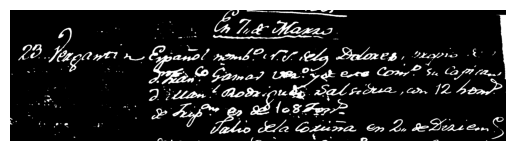

In [ ]:
mask = (retina < t0)
vessels = filters.sato(retina, sigmas=range(1, 10)) * mask
_, ax = plt.subplots()
ax.imshow(color.label2rgb(labeled, retina))
ax.set_axis_off()

thresh = threshold_otsu(retina)
binary = thresh > retina


ax.imshow(binary, cmap = 'gray')
plt.savefig('binary_page_black')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import argparse
import cv2
# construct the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=False,
                 	default="drive/MyDrive/Global_Americas/binary_page_noncomp.png", help = 'path to input image')
ap.add_argument("-c", "--connectivity", type=int, default=4,
	help="connectivity for connected component analysis")
ap.add_argument("-f", required=False)
args = vars(ap.parse_args())

In [ ]:
# load the input image from disk, convert it to grayscale, and
# threshold it
#dont need

image = cv2.imread(args["image"])
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

In [ ]:
# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(
	thresh, args["connectivity"], cv2.CV_32S)
(numLabels, labels, stats, centroids) = output

In [ ]:
# loop over the number of unique connected component labels
for i in range(0, numLabels):
	# if this is the first component then we examine the
	# *background* (typically we would just ignore this
	# component in our loop)
	if i == 0:
		text = "examining component {}/{} (background)".format(
			i + 1, numLabels)
	# otherwise, we are examining an actual connected component
	else:
		text = "examining component {}/{}".format( i + 1, numLabels)
	# print a status message update for the current connected
	# component
	print("[INFO] {}".format(text))
	# extract the connected component statistics and centroid for
	# the current label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]
	(cX, cY) = centroids[i]

In [ ]:
	# clone our original image (so we can draw on it) and then draw
	# a bounding box surrounding the connected component along with
	# a circle corresponding to the centroid
	output = image.copy()
	cv2.rectangle(output, (x, y), (x + w, y + h), (0, 255, 0), 3)
	cv2.circle(output, (int(cX), int(cY)), 4, (0, 0, 255), -1)

In [ ]:
# construct a mask for the current connected component by
# finding a pixels in the labels array that have the current
# connected component ID
from google.colab.patches import cv2_imshow
componentMask = (labels == 110).astype("uint8") * 255
# show our output image and connected component mask
#output
cv2_imshow(output)
#connected component
cv2_imshow(componentMask)
cv2.waitKey(0)

In [ ]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
# apply connected component analysis to the thresholded image
output = cv2.connectedComponentsWithStats(
	thresh, args["connectivity"], cv2.CV_32S)
(numLabels, labels, stats, centroids) = output
# initialize an output mask to store all characters parsed from
# the license plate
mask = np.zeros(gray.shape, dtype="uint8")

In [ ]:
for i in range(1, numLabels):
	# extract the connected component statistics for the current
	# label
	x = stats[i, cv2.CC_STAT_LEFT]
	y = stats[i, cv2.CC_STAT_TOP]
	w = stats[i, cv2.CC_STAT_WIDTH]
	h = stats[i, cv2.CC_STAT_HEIGHT]
	area = stats[i, cv2.CC_STAT_AREA]

In [ ]:
# ensure the width, height, and area are all neither too small
	# nor too big
keepWidth = w > 15 and w < 50
keepHeight = h > 15 and h < 65
keepArea = area > 15 and area < 1500
# ensure the connected component we are examining passes all
# three tests
if all((keepWidth, keepHeight, keepArea)):
	# construct a mask for the current connected component and
	# then take the bitwise OR with the mask
	print("[INFO] keeping connected component '{}'".format(i))
	componentMask = (labels == i).astype("uint8") * 255
	mask = cv2.bitwise_or(mask, componentMask)

In [ ]:
cv2_imshow(image)
cv2_imshow(mask)
cv2.waitKey(0)

In [ ]:
#pipeline
#input - cut pages - segmentation - clustering/cleaning - deslanting - deslanting- word segmentation - CNN -> results